# Recomendation system : Book Recommendation 

### Oleh : [Ahmad Habib Husaini](https://www.linkedin.com/in/ahmad-habib-husaini-1705711b0/)

#### Pendahuluan
Pada proyek ini, topik yang dibahas adalah mengenai pembuatan sistem rekomendasi dengan data book . Proyek ini dibuat untuk proyek Submission 2 - Machine Learning Terapan Dicoding.

# 1. Import important package

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import opendatasets
import wget
import zipfile
from tqdm import tqdm
import os

# 2. Data loading

## 2.1 Data Acquisition

In [2]:
if os.path.exists('book-recommendation-dataset'):
    print("file sudah ada")
else:
    opendatasets.download_kaggle_dataset(dataset_url='https://www.kaggle.com/arashnic/book-recommendation-dataset', data_dir='')

file sudah ada


Pada tahapan *data loading* berisikan akuisisi data dengan mengunduh dataset pada [link](https://www.kaggle.com/arashnic/book-recommendation-dataset) dengan menggunakan library `opendatasets` dengan sintaks seperti diatas. Ketika merunning code tersebut akan diminta mengisikan username dan key. 
1. username silahkan disisi dengan username *account* kaggle
2. key didapatkan dengan :
    1. Buka website [kaggle](https://www.kaggle.com/), 
    2. login dengan akun masing-masing. 
    3. Pilih your profile pada kanan atas 
    4. Pilih *account*
    5. Scroll sedikit kebawah maka akan ada pilihan `Create new API token`
    <img src="image/kaggle_token.png" style="zoom:5%;" /> <br>
    6. Setelah menekan pilihan tersebut akan terunduh file kaggle.json yang berisikan username dan key

## 2.2 Memuat data dalam format Dataframe

### 2.2.1 Book Dataframe 

In [3]:
df_book = pd.read_csv('book-recommendation-dataset/Books.csv')
df_book.head(3)

D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\IPython\core\interactiveshell.py:3020: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...


### 2.2.2 Rating Dataframe

In [4]:
df_rating = pd.read_csv('book-recommendation-dataset/Ratings.csv')
df_rating.head(3)

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0


### 2.2.4 User Dataframe

In [5]:
df_user = pd.read_csv('book-recommendation-dataset/Users.csv')
df_user.tail(3)

,User-ID,Location,Age
278855,278856,"brampton, ontario, canada",NaN
278856,278857,"knoxville, tennessee, usa",NaN
278857,278858,"dublin, n/a, ireland",NaN


# 3. Data Understanding

## 3.1 Informasi dataset

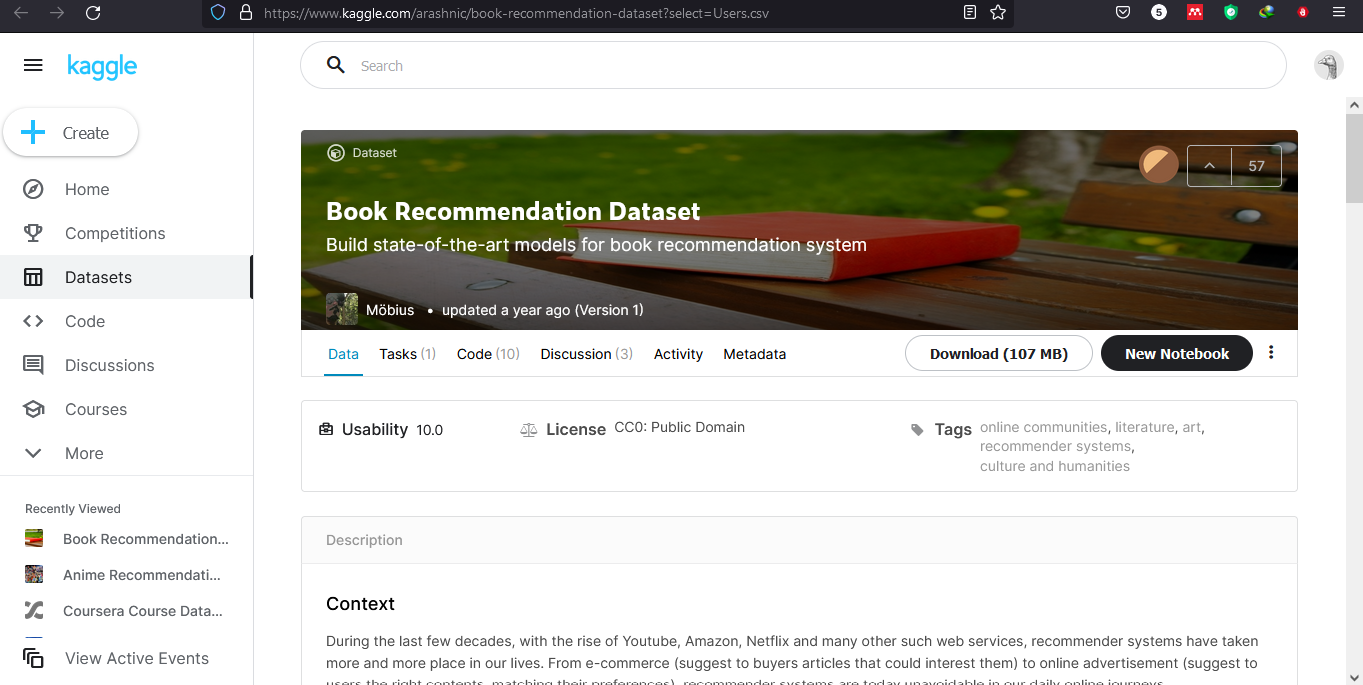<br>
Pada berkas yang dapat diunduh pada link [berikut](https://www.kaggle.com/arashnic/book-recommendation-dataset?select=Users.csv) berisikan dataset berjumlah 3 buah file yakni Book.csv, Rating.csv dan User.csv


### 3.1.1 Book

Berisikan data sebanyak 271360 baris dan 8 kolom yang terdiri dari: <br>

Kolom  | Keterangan
:------------- | :-------------
Sumber  | https://www.kaggle.com/arashnic/book-recommendation-dataset?select=Books.csv
ISBN | International Standard Book Number merupakan kode unik masing masing buku
Book-title | Merupakan judul dari tiap buku
Book-Author | Merupakan penulis atau pengarang tiap buku
Year-Of_Publication |Merupakan tahun terbit tiap buku
Publisher | Merupakan lebaga penerbit tiap buku
Image-URL-S | Link foto dari tiap buku berukuran kecil
Image-URL-M | Link foto dari tiap buku berukuran sedang
Image-URL-L | Link foto dari tiap buku berukuran besar

### 3.1.2 Rating
Berisikan data sebanyak 1149780 baris dan 3 kolom yang terdiri dari:

Kolom  | Keterangan
:------------- | :-------------
Sumber  | https://www.kaggle.com/arashnic/book-recommendation-dataset?select=Ratings.csv
User-ID | Merupakan kode unik tiap user
ISBN | International Standard Book Number merupakan kode unik masing masing buku
Book-Rating |Merupakan rating dari tiap buku

### 3.1.3 User

Berisikan data sebanyak 278858 baris dan 4 kolom yang terdiri dari: <br>

Kolom  | Keterangan
:------------- | :-------------
Sumber  | https://www.kaggle.com/arashnic/book-recommendation-dataset?select=Users.csv
User-ID | Merupakan kode unik tiap user
Age | Merupakan umur tiap user
Location |Merupakan lokasi tiap user 

## 3.2 Cek Missing Values, tipe data & summary statistical descriptive

### 3.2.1 Book

In [6]:
pd.DataFrame(df_book.isnull().sum(), columns=['missing_values'])

,missing_values
ISBN,0
Book-Title,0
Book-Author,1
Year-Of-Publication,0
Publisher,2
Image-URL-S,0
Image-URL-M,0
Image-URL-L,3


In [7]:
df_book.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 271360 entries, 0 to 271359
Data columns (total 8 columns):
ISBN                   271360 non-null object
Book-Title             271360 non-null object
Book-Author            271359 non-null object
Year-Of-Publication    271360 non-null object
Publisher              271358 non-null object
Image-URL-S            271360 non-null object
Image-URL-M            271360 non-null object
Image-URL-L            271357 non-null object
dtypes: object(8)
memory usage: 16.6+ MB


In [8]:
df_book.loc[:,:'Publisher'].describe(include=object)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher
count,271360,271360,271359,271360,271358
unique,271360,242135,102023,202,16807
top,0864424655,Selected Poems,Agatha Christie,2002,Harlequin
freq,1,27,632,13903,7535


### 3.2.2 Rating

In [9]:
pd.DataFrame(df_rating.isnull().sum(), columns=['missing_values'])

,missing_values
User-ID,0
ISBN,0
Book-Rating,0


In [10]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null int64
dtypes: int64(2), object(1)
memory usage: 26.3+ MB


In [11]:
df_rating[['Book-Rating']].describe()

,Book-Rating
count,1.149780e+06
mean,2.866950e+00
std,3.854184e+00
min,0.000000e+00
25%,0.000000e+00
50%,0.000000e+00
75%,7.000000e+00
max,1.000000e+01


In [12]:
df_rating['Book-Rating'] = df_rating['Book-Rating'].astype(object)

In [13]:
df_rating.describe(include=[object])

,ISBN,Book-Rating
count,1149780,1149780
unique,340556,11
top,0971880107,0
freq,2502,716109


In [14]:
df_rating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1149780 entries, 0 to 1149779
Data columns (total 3 columns):
User-ID        1149780 non-null int64
ISBN           1149780 non-null object
Book-Rating    1149780 non-null object
dtypes: int64(1), object(2)
memory usage: 26.3+ MB


### 3.2.3 User

In [15]:
df_user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [16]:
df_user.Location.unique()

array(['nyc, new york, usa', 'stockton, california, usa',
       'moscow, yukon territory, russia', ...,
       'sergnano, lombardia, italy', 'stranraer, n/a, united kingdom',
       'tacoma, washington, united kingdom'], dtype=object)

In [17]:
df_user.Location.str.split(',',expand=True).loc[:,:2][0].unique()

array(['nyc', 'stockton', 'moscow', ..., 'llangollen', 'sergnano',
       'stranraer'], dtype=object)

In [18]:
len(df_user.Location.str.split(',',expand=True).loc[:,:2][0].unique())

32770

In [19]:
df_user.Location.str.split(',',expand=True).loc[:,:2][1].unique()

array([' new york', ' california', ' yukon territory', ..., ' co.donegal',
       ' ±±¾©', ' denbighshire county'], dtype=object)

In [20]:
len(df_user.Location.str.split(',',expand=True).loc[:,:2][1].unique())

6335

In [21]:
df_user['city'] = df_user.Location.str.split(',',expand=True)[0]
# df_user['nation_state'] = df_user.Location.str.split(',',expand=True)[1]
df_user['country'] = df_user.Location.str.split(',',expand=True)[2]
df_user.head()

,User-ID,Location,Age,city,country
0,1,"nyc, new york, usa",NaN,nyc,usa
1,2,"stockton, california, usa",18.0,stockton,usa
2,3,"moscow, yukon territory, russia",NaN,moscow,russia
3,4,"porto, v.n.gaia, portugal",17.0,porto,portugal
4,5,"farnborough, hants, united kingdom",NaN,farnborough,united kingdom


In [22]:
pd.DataFrame(df_user.isnull().sum(), columns=['missing_values'])

,missing_values
User-ID,0
Location,0
Age,110762
city,0
country,2


In [23]:
df_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 278858 entries, 0 to 278857
Data columns (total 5 columns):
User-ID     278858 non-null int64
Location    278858 non-null object
Age         168096 non-null float64
city        278858 non-null object
country     278856 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 10.6+ MB


In [24]:
pd.set_option('display.max_rows',105)

In [25]:
df_user.groupby('country')[['country']].count().head(10)

,country
country,
,4598
,14
australia,1
england,1
pasig city.,1
&#20013;&#22269;,1
&#32654;&#22269;,1
*,1
-,1


In [26]:
df_user.drop(columns=['country'], inplace=True)

In [27]:
df_user[['Age']].describe()

,Age
count,168096.000000
mean,34.751434
std,14.428097
min,0.000000
25%,24.000000
50%,32.000000
75%,44.000000
max,244.000000


In [28]:
df_user.describe(include=object)

,Location,city
count,278858,278858
unique,57339,32770
top,"london, england, united kingdom",london
freq,2506,4105


`Kesimpulan dari Tahapan ini :`
1. Book
    - Buku dengan judul terbanyak adalah Selected Poems dengan jumlah 27 buah
    - Penulis terbanyak adalah Agatha Christie dengan total 632 karya
    - Buku terbitan tahun 2002 menjadi buku terbanyak
    - Lembaga penerbit yang paling banayk menerbitkan buku adalah Harlequin
2. Rating
    - masih banyak buku yang belum dirating, yakni sebanyak 716109
3. User
    - Banyak data umur yang kosong kemungkinan tidak akan digunakan
    - london menjadi kota user terbanyak sebanyak 139187 user

## 3.3 Visualisasi Data

### 3.3.1 Book

In [29]:
count_book = {key: len(df_book[key].unique()) for key in df_book.columns[1:5]}

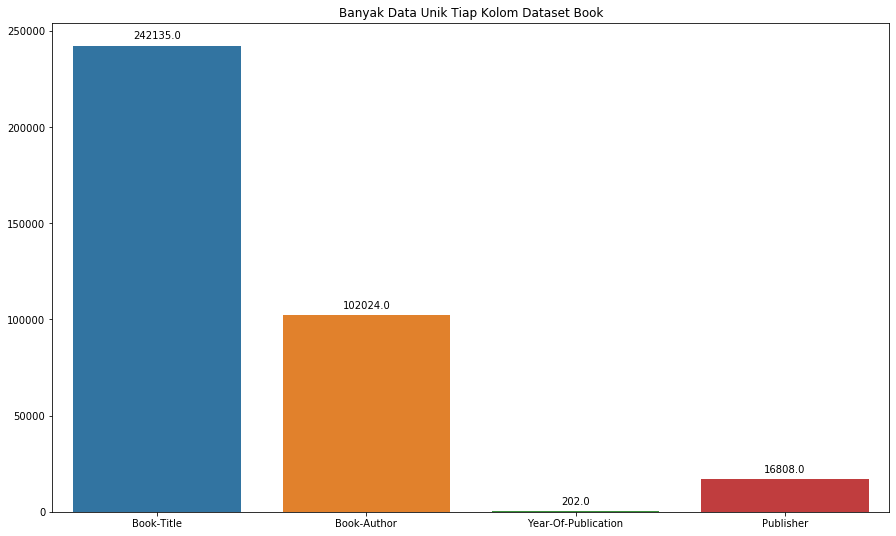

In [30]:
plt.figure(figsize=(15,9))
ax = sns.barplot(x=list(count_book.keys()), y=list(count_book.values()))
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title("Banyak Data Unik Tiap Kolom Dataset Book")
plt.show()

### 3.3.2 Rating

In [31]:
count_rating = {key: len(df_rating[key].unique()) for key in df_rating.columns}

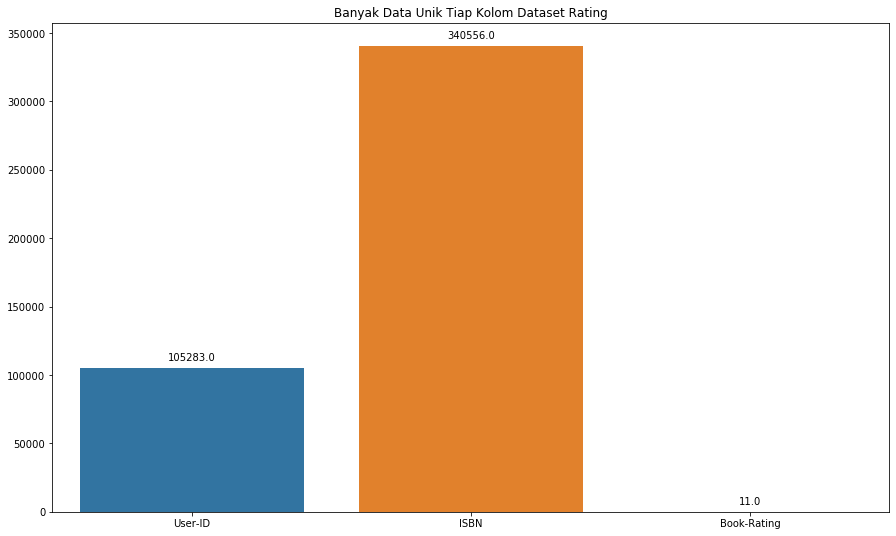

In [32]:
plt.figure(figsize=(15,9))
ax = sns.barplot(x=list(count_rating.keys()), y=list(count_rating.values()))
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title("Banyak Data Unik Tiap Kolom Dataset Rating")
plt.show()

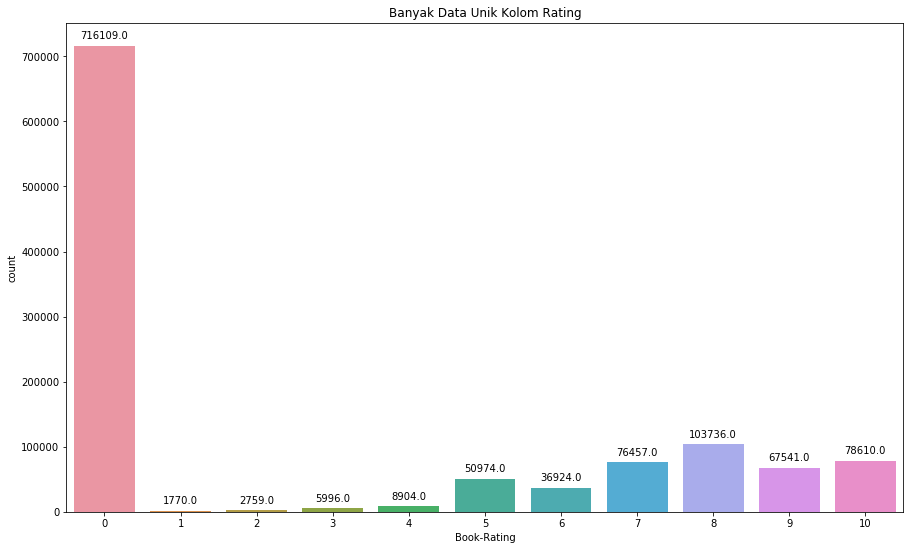

In [33]:
plt.figure(figsize=(15,9))
ax = sns.countplot(data=df_rating, x='Book-Rating')
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title("Banyak Data Unik Kolom Rating")
plt.show()

### 3.3.3 Users

In [34]:
df_user.head()

,User-ID,Location,Age,city
0,1,"nyc, new york, usa",NaN,nyc
1,2,"stockton, california, usa",18.0,stockton
2,3,"moscow, yukon territory, russia",NaN,moscow
3,4,"porto, v.n.gaia, portugal",17.0,porto
4,5,"farnborough, hants, united kingdom",NaN,farnborough


In [35]:
count_users = {key: len(df_user[key].unique()) for key in df_user.columns}

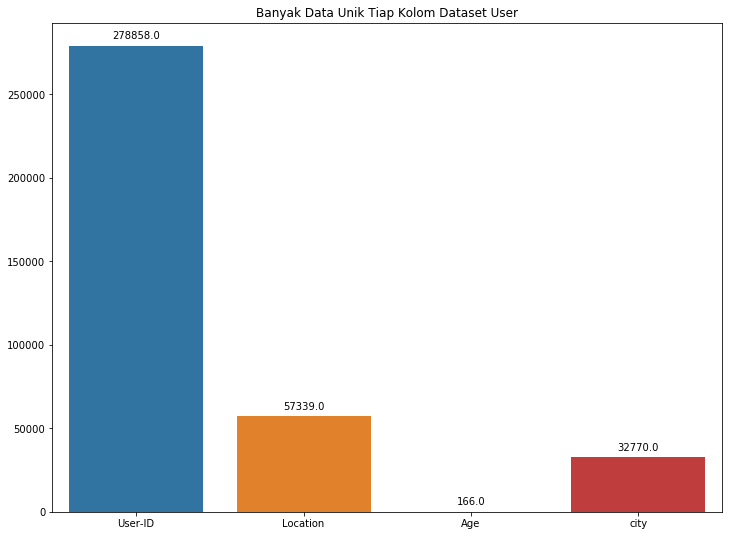

In [36]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=list(count_users.keys()), y=list(count_users.values()))
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title("Banyak Data Unik Tiap Kolom Dataset User")
plt.show()

In [37]:
city_top10 = df_user.city.value_counts().head(10).reset_index()
city_top10.columns = ['city', 'count']
city_top10

,city,count
0,london,4105
1,barcelona,2664
2,toronto,2342
3,madrid,1933
4,sydney,1884
5,portland,1869
6,melbourne,1863
7,vancouver,1699
8,chicago,1566
9,seattle,1541


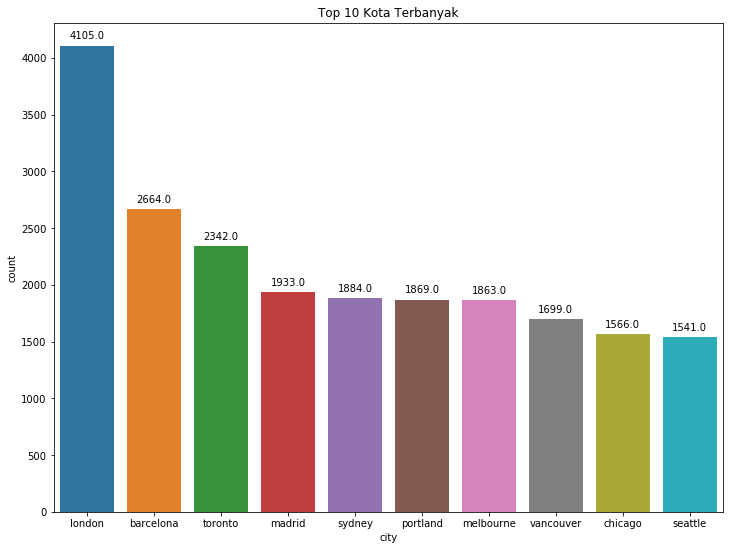

In [38]:
plt.figure(figsize=(12,9))
ax = sns.barplot(x=city_top10.city, y=city_top10['count'])
for p in ax.patches:
        ax.annotate(format(p.get_height(), '.1f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')
ax.set_title("Top 10 Kota Terbanyak")
plt.show()

# 4. Data Preparation & Data Preprocessing

## 4.1 Memilih fitur untuk sistem rekomendasi

In [39]:
df_fix = df_book.iloc[:,0:4]
df_fix.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication
0,0195153448,Classical Mythology,Mark P. O. Morford,2002
1,0002005018,Clara Callan,Richard Bruce Wright,2001
2,0060973129,Decision in Normandy,Carlo D'Este,1991
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999


In [40]:
pd.DataFrame({
    'missing_values':df_fix.isnull().sum(),
    'presentase':df_fix.isnull().sum()/len(df_fix)
})

,missing_values,presentase
ISBN,0,0.000000
Book-Title,0,0.000000
Book-Author,1,0.000004
Year-Of-Publication,0,0.000000


## 4.2 Hapus Missing Value dan data duplicate pada dataset fix

In [41]:
df_fix.dropna(inplace=True)
df_fix.drop_duplicates(inplace=True)

D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [42]:
df_fix.shape

(271359, 4)

## 4.3 Create Metadata

In [43]:
df_fix['Year-Of-Publication'] = df_fix['Year-Of-Publication'].astype('str')

D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [44]:
df_fix['metadata'] = ""
for col in ['Book-Title', 'Book-Author', 'Year-Of-Publication']:
    df_fix['metadata'] += df_fix[col]
    df_fix['metadata'] += " "

D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Pemrograman\miniconda3\envs\my_env\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be se

In [45]:
df_fix.tail()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
271355,0440400988,There's a Bat in Bunk Five,Paula Danziger,1988,There's a Bat in Bunk Five Paula Danziger 1988
271356,0525447644,From One to One Hundred,Teri Sloat,1991,From One to One Hundred Teri Sloat 1991
271357,006008667X,Lily Dale : The True Story of the Town that Ta...,Christine Wicker,2004,Lily Dale : The True Story of the Town that Ta...
271358,0192126040,Republic (World's Classics),Plato,1996,Republic (World's Classics) Plato 1996
271359,0767409752,A Guided Tour of Rene Descartes' Meditations o...,Christopher Biffle,2000,A Guided Tour of Rene Descartes' Meditations o...


## 4.4 Encoding dengan TF-IDF

In [46]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [47]:
bow = CountVectorizer()
bank = bow.fit_transform(df_fix.metadata)

In [48]:
tfidf = TfidfVectorizer()
bank2 = tfidf.fit_transform(df_fix.metadata)

# 5. Modeling

## 5.1 Encoding metadata index

In [49]:
index = 0
content = df_fix.loc[index, 'metadata']
content

'Classical Mythology Mark P. O. Morford 2002 '

In [50]:
code1 = bow.transform([content])
code1

<1x113852 sparse matrix of type '<class 'numpy.int64'>'
	with 5 stored elements in Compressed Sparse Row format>

In [51]:
code2 = tfidf.transform([content])

## 5.2 Document Search

In [52]:
from sklearn.metrics.pairwise import cosine_distances

In [53]:
distance1 = cosine_distances(code1, bank)
distance1

array([[1.11022302e-16, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00]])

In [54]:
rec_idx = distance1.argsort()[0, 1:]
rec_idx

array([111977, 193922,  95231, ...,  94090,  94077, 271358], dtype=int64)

In [55]:
df_fix.loc[rec_idx[:5], :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
111977,0582280044,Classical mythology,Mark P.O Morford,1985,Classical mythology Mark P.O Morford 1985
193922,0943518334,C data base development,Al Stevens,1987,C data base development Al Stevens 1987
95231,0801319536,Classical Mythology,Mark P. O. Morford,1998,Classical Mythology Mark P. O. Morford 1998
28887,0310702941,Olympics 2002,Mark Littleton,2002,Olympics 2002 Mark Littleton 2002
28889,031070295X,Football,Mark Littleton,2002,Football Mark Littleton 2002


In [56]:
distance2 = cosine_distances(code2, bank)
distance2

array([[0.05608014, 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ]])

In [57]:
rec_idx2 = distance2.argsort()[0, 1:]
rec_idx2

array([ 95231, 111977, 193922, ...,  94090,  94077, 271358], dtype=int64)

In [58]:
df_fix.loc[rec_idx2[:10], :]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
95231,0801319536,Classical Mythology,Mark P. O. Morford,1998,Classical Mythology Mark P. O. Morford 1998
111977,0582280044,Classical mythology,Mark P.O Morford,1985,Classical mythology Mark P.O Morford 1985
193922,0943518334,C data base development,Al Stevens,1987,C data base development Al Stevens 1987
43410,0844255610,Mythology and You : Classical Mythology and it...,Donna Rosenberg,2001,Mythology and You : Classical Mythology and it...
189226,0340571195,The Sins of the Father,Allan Massie,1992,The Sins of the Father Allan Massie 1992
53103,0440208483,Dictionary of Mythology: Mainly Classical,Bergen Evans,1994,Dictionary of Mythology: Mainly Classical Berg...
271139,0525471812,Film: A Montage of Theories,"Richard Dyer, Ed. MacCann",1966,"Film: A Montage of Theories Richard Dyer, Ed. ..."
86669,0140512357,The Penguin Dictionary of Classical Mythology ...,Pierre Grimal,1992,The Penguin Dictionary of Classical Mythology ...
152608,0460861360,Who's Who in Non-Classical Mythology,Egerston Sykes,1995,Who's Who in Non-Classical Mythology Egerston ...
51438,9626341157,Dracula (Classical Literature with Classical M...,Brian Cox,1997,Dracula (Classical Literature with Classical M...


## 5.3 Bungkus code agar rapih

In [59]:
class RecommendationSystems():
    def __init__(self,data, metadata_col):
        self.df = data
        self.metadata = metadata_col
        self.encoder = None
        self.bank = None
    
    def fit(self, encoder='tfidf'):
        if encoder not in ['bow', 'tfidf']:
            print("hanya support BoW dan TF-IDF")
        else:
            self.encoder = TfidfVectorizer()
            if encoder=='bow':
                self.encoder = CountVectorizer()
            self.bank = self.encoder.fit_transform(self.df[self.metadata])
    def recommender(self, index, topn=10):
        content = self.df.loc[index, self.metadata]
        code = self.encoder.transform([content])
        distance = cosine_distances(code, self.bank)
        rec_idx = distance.argsort()[0, 1:]
        return self.df.loc[rec_idx[:topn], :]

In [60]:
recsys = RecommendationSystems(df_fix, 'metadata')
recsys.fit()

In [61]:
rec = recsys.recommender(100)
rec

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
214915,0448060167,King Arthur and His Knights of the Round Table...,Thomas Mallory,1976,King Arthur and His Knights of the Round Table...
123687,0385425325,Prize Stories 1993: The O. Henry Awards (Prize...,William Abrahams,1993,Prize Stories 1993: The O. Henry Awards (Prize...
123688,0385421923,Prize Stories 1992 : The O. Henry Awards (Priz...,WILLIAM ABRAHAMS,1992,Prize Stories 1992 : The O. Henry Awards (Priz...
245493,0140060081,Voss (King Penguin S.),Patrick White,1981,Voss (King Penguin S.) Patrick White 1981
50707,0385264992,Prize Stories 1990: The O. Henry Awards (Prize...,William Abrahams,1990,Prize Stories 1990: The O. Henry Awards (Prize...
209825,0449130193,Deadly Admirer,Robert Arthur Smith,1987,Deadly Admirer Robert Arthur Smith 1987
241796,0385124007,The Way of a Pilgrim and the Pilgrim Continues...,Helen Bacovcin,1978,The Way of a Pilgrim and the Pilgrim Continues...
56459,038524634X,Prize Stories 1989: The O. Henry Awards,William Abrahams,1989,Prize Stories 1989: The O. Henry Awards Willia...
209571,0310390214,How to Read the Bible as Literature,Leland Ryken,1985,How to Read the Bible as Literature Leland Ryk...
115627,0385231555,Prize Stories 1986: The O. Henry Awards,William Abrahams,1986,Prize Stories 1986: The O. Henry Awards Willia...


In [62]:
df_fix.loc[100,:]

ISBN                                                          0385235941
Book-Title                       Prize Stories, 1987: The O'Henry Awards
Book-Author                                             William Abrahams
Year-Of-Publication                                                 1987
metadata               Prize Stories, 1987: The O'Henry Awards Willia...
Name: 100, dtype: object

In [63]:
recsys2 = RecommendationSystems(df_fix, 'metadata')
recsys2.fit('bow')

In [64]:
rec2 = recsys2.recommender(100)
rec2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
123687,0385425325,Prize Stories 1993: The O. Henry Awards (Prize...,William Abrahams,1993,Prize Stories 1993: The O. Henry Awards (Prize...
214915,0448060167,King Arthur and His Knights of the Round Table...,Thomas Mallory,1976,King Arthur and His Knights of the Round Table...
245493,0140060081,Voss (King Penguin S.),Patrick White,1981,Voss (King Penguin S.) Patrick White 1981
50707,0385264992,Prize Stories 1990: The O. Henry Awards (Prize...,William Abrahams,1990,Prize Stories 1990: The O. Henry Awards (Prize...
123688,0385421923,Prize Stories 1992 : The O. Henry Awards (Priz...,WILLIAM ABRAHAMS,1992,Prize Stories 1992 : The O. Henry Awards (Priz...
209571,0310390214,How to Read the Bible as Literature,Leland Ryken,1985,How to Read the Bible as Literature Leland Ryk...
241796,0385124007,The Way of a Pilgrim and the Pilgrim Continues...,Helen Bacovcin,1978,The Way of a Pilgrim and the Pilgrim Continues...
115627,0385231555,Prize Stories 1986: The O. Henry Awards,William Abrahams,1986,Prize Stories 1986: The O. Henry Awards Willia...
56459,038524634X,Prize Stories 1989: The O. Henry Awards,William Abrahams,1989,Prize Stories 1989: The O. Henry Awards Willia...
209825,0449130193,Deadly Admirer,Robert Arthur Smith,1987,Deadly Admirer Robert Arthur Smith 1987


## 5.4 Scoring

## 5.4.1 Try

In [65]:
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

In [66]:
book = pd.DataFrame(dict(df_fix.loc[100,:]), index=[0])
book

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
0,0385235941,"Prize Stories, 1987: The O'Henry Awards",William Abrahams,1987,"Prize Stories, 1987: The O'Henry Awards Willia..."


In [67]:
rec2

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
123687,0385425325,Prize Stories 1993: The O. Henry Awards (Prize...,William Abrahams,1993,Prize Stories 1993: The O. Henry Awards (Prize...
214915,0448060167,King Arthur and His Knights of the Round Table...,Thomas Mallory,1976,King Arthur and His Knights of the Round Table...
245493,0140060081,Voss (King Penguin S.),Patrick White,1981,Voss (King Penguin S.) Patrick White 1981
50707,0385264992,Prize Stories 1990: The O. Henry Awards (Prize...,William Abrahams,1990,Prize Stories 1990: The O. Henry Awards (Prize...
123688,0385421923,Prize Stories 1992 : The O. Henry Awards (Priz...,WILLIAM ABRAHAMS,1992,Prize Stories 1992 : The O. Henry Awards (Priz...
209571,0310390214,How to Read the Bible as Literature,Leland Ryken,1985,How to Read the Bible as Literature Leland Ryk...
241796,0385124007,The Way of a Pilgrim and the Pilgrim Continues...,Helen Bacovcin,1978,The Way of a Pilgrim and the Pilgrim Continues...
115627,0385231555,Prize Stories 1986: The O. Henry Awards,William Abrahams,1986,Prize Stories 1986: The O. Henry Awards Willia...
56459,038524634X,Prize Stories 1989: The O. Henry Awards,William Abrahams,1989,Prize Stories 1989: The O. Henry Awards Willia...
209825,0449130193,Deadly Admirer,Robert Arthur Smith,1987,Deadly Admirer Robert Arthur Smith 1987


In [68]:
np.mean(cosine_similarity(bow.transform(book.metadata.values), bow.transform(rec.metadata)))

0.3912628618486978

In [69]:
np.mean(cosine_similarity(tfidf.transform(book.metadata.values), tfidf.transform(rec.metadata)))

0.42042146692295573

## 5.4.2 Bungkus kembali kedalam class

In [70]:
class RecommendationSystems():
    def __init__(self,data, metadata_col):
        self.df = data
        self.metadata = metadata_col
        self.encoder = None
        self.bank = None
        self.content = None
        self.index = None
        self.topn = None
    
    def fit(self, encoder='tfidf'):
        if encoder not in ['bow', 'tfidf']:
            print("hanya support BoW dan TF-IDF")
        else:
            self.encoder = TfidfVectorizer()
            if encoder=='bow':
                self.encoder = CountVectorizer()
            self.bank = self.encoder.fit_transform(self.df[self.metadata])
    def recommender(self, index, topn=10, include_book_search=False):
        self.index = index       
        self.topn = topn
        self.content = self.df.loc[index, self.metadata]
        code = self.encoder.transform([self.content])
        distance = cosine_distances(code, self.bank)
        rec_idx = distance.argsort()[0, :]
        if include_book_search:
            topn+=1
            return self.df.loc[rec_idx[:topn], :] 
        return self.df.loc[rec_idx[1:topn], :]

    def score(self):
        rec = self.recommender(index=self.index, topn=self.topn, include_book_search=True)
        bank = self.encoder.transform(rec.metadata)
        code = self.encoder.transform([self.content])
        return np.mean(cosine_similarity(code, bank)[:,1:])

In [71]:
recsys3 = RecommendationSystems(df_fix, 'metadata')
recsys3.fit()
recsys3.recommender(index=100, include_book_search=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
100,0385235941,"Prize Stories, 1987: The O'Henry Awards",William Abrahams,1987,"Prize Stories, 1987: The O'Henry Awards Willia..."
214915,0448060167,King Arthur and His Knights of the Round Table...,Thomas Mallory,1976,King Arthur and His Knights of the Round Table...
123687,0385425325,Prize Stories 1993: The O. Henry Awards (Prize...,William Abrahams,1993,Prize Stories 1993: The O. Henry Awards (Prize...
123688,0385421923,Prize Stories 1992 : The O. Henry Awards (Priz...,WILLIAM ABRAHAMS,1992,Prize Stories 1992 : The O. Henry Awards (Priz...
245493,0140060081,Voss (King Penguin S.),Patrick White,1981,Voss (King Penguin S.) Patrick White 1981
50707,0385264992,Prize Stories 1990: The O. Henry Awards (Prize...,William Abrahams,1990,Prize Stories 1990: The O. Henry Awards (Prize...
209825,0449130193,Deadly Admirer,Robert Arthur Smith,1987,Deadly Admirer Robert Arthur Smith 1987
241796,0385124007,The Way of a Pilgrim and the Pilgrim Continues...,Helen Bacovcin,1978,The Way of a Pilgrim and the Pilgrim Continues...
56459,038524634X,Prize Stories 1989: The O. Henry Awards,William Abrahams,1989,Prize Stories 1989: The O. Henry Awards Willia...
209571,0310390214,How to Read the Bible as Literature,Leland Ryken,1985,How to Read the Bible as Literature Leland Ryk...


In [72]:
recsys3.score()

0.42042146692295573

In [73]:
import time

In [74]:
start = time.time()
recsys4 = RecommendationSystems(df_fix, 'metadata')
recsys4.fit('bow')
recsys4.recommender(index=100)
stop = time.time()
print(f"Training time: {stop - start} s")
print("Score : ",recsys4.score())

Training time: 3.260321855545044 s
Score :  0.3912628618486978


## 5.4.3 Scoring Model dengan *Bag Of Word* top 5 rekomendasi

In [75]:
recsys = RecommendationSystems(data=df_fix, metadata_col='metadata')
recsys.fit(encoder='bow')

In [76]:
recsys.recommender(index=100, topn=5, include_book_search=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
100,0385235941,"Prize Stories, 1987: The O'Henry Awards",William Abrahams,1987,"Prize Stories, 1987: The O'Henry Awards Willia..."
123687,0385425325,Prize Stories 1993: The O. Henry Awards (Prize...,William Abrahams,1993,Prize Stories 1993: The O. Henry Awards (Prize...
214915,0448060167,King Arthur and His Knights of the Round Table...,Thomas Mallory,1976,King Arthur and His Knights of the Round Table...
245493,0140060081,Voss (King Penguin S.),Patrick White,1981,Voss (King Penguin S.) Patrick White 1981
50707,0385264992,Prize Stories 1990: The O. Henry Awards (Prize...,William Abrahams,1990,Prize Stories 1990: The O. Henry Awards (Prize...
123688,0385421923,Prize Stories 1992 : The O. Henry Awards (Priz...,WILLIAM ABRAHAMS,1992,Prize Stories 1992 : The O. Henry Awards (Priz...


In [77]:
recsys.score()

0.43335635317690535

In [78]:
recsys.recommender(index=1000, topn=5, include_book_search=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
1000,0064472779,All-American Girl,Meg Cabot,2003,All-American Girl Meg Cabot 2003
28636,0330415557,All American Girl,Meg Cabot,2003,All American Girl Meg Cabot 2003
63799,033040069X,All American Girl,Meg Cabot,2002,All American Girl Meg Cabot 2002
17397,0060294698,All-American Girl,Meg Cabot,2002,All-American Girl Meg Cabot 2002
26077,0060085452,Boy Meets Girl,Meg Cabot,2004,Boy Meets Girl Meg Cabot 2004
86868,0739439723,Boy Meets Girl,Meg Cabot,2004,Boy Meets Girl Meg Cabot 2004


In [79]:
recsys.score()

0.7333333333333335

## 5.4.4 Scoring Model Tf-idf

In [80]:
recsys = RecommendationSystems(data=df_fix, metadata_col='metadata')
recsys.fit(encoder='tfidf')

In [81]:
recsys.recommender(index=100, topn=5, include_book_search=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
100,0385235941,"Prize Stories, 1987: The O'Henry Awards",William Abrahams,1987,"Prize Stories, 1987: The O'Henry Awards Willia..."
214915,0448060167,King Arthur and His Knights of the Round Table...,Thomas Mallory,1976,King Arthur and His Knights of the Round Table...
123687,0385425325,Prize Stories 1993: The O. Henry Awards (Prize...,William Abrahams,1993,Prize Stories 1993: The O. Henry Awards (Prize...
123688,0385421923,Prize Stories 1992 : The O. Henry Awards (Priz...,WILLIAM ABRAHAMS,1992,Prize Stories 1992 : The O. Henry Awards (Priz...
245493,0140060081,Voss (King Penguin S.),Patrick White,1981,Voss (King Penguin S.) Patrick White 1981
50707,0385264992,Prize Stories 1990: The O. Henry Awards (Prize...,William Abrahams,1990,Prize Stories 1990: The O. Henry Awards (Prize...


In [82]:
recsys.score()

0.49243983602215274

In [83]:
recsys.recommender(index=1000, topn=5, include_book_search=True)

,ISBN,Book-Title,Book-Author,Year-Of-Publication,metadata
1000,0064472779,All-American Girl,Meg Cabot,2003,All-American Girl Meg Cabot 2003
28636,0330415557,All American Girl,Meg Cabot,2003,All American Girl Meg Cabot 2003
17397,0060294698,All-American Girl,Meg Cabot,2002,All-American Girl Meg Cabot 2002
63799,033040069X,All American Girl,Meg Cabot,2002,All American Girl Meg Cabot 2002
26077,0060085452,Boy Meets Girl,Meg Cabot,2004,Boy Meets Girl Meg Cabot 2004
86868,0739439723,Boy Meets Girl,Meg Cabot,2004,Boy Meets Girl Meg Cabot 2004


In [84]:
recsys.score()

0.8377599612086435

# 6 Evaluasi

## 6.1 Generate data yang akan dijadikan sampel sebanyak 500 data

In [85]:
np.random.randint(0,10, 5)

array([1, 4, 5, 7, 7])

In [86]:
idx_sample_list = np.random.randint(0,len(df_fix), 500)
idx_sample_list

array([121114, 109683, 104503,  52396,  69316,  27621, 153576, 258159,
       233576,  22506, 237838, 185440, 139493,  52238,    721, 180231,
       244284, 153637, 148896,  34984, 209037, 259480,  89758, 160489,
       236038,  90334,  55565,  62139,  63779,  16741, 106004,  65883,
       128203, 182156,  20648,  36447,  88649, 235703, 180240, 136774,
       246138,  88676, 105912, 172027, 183648, 250867,  56949, 124808,
        25273, 135815,  97695, 112520,  21305, 216485,   5877,  73929,
       260212, 262221,  87143,  45406, 184965, 242659, 233056, 110043,
       159186,   3756, 247634, 160057, 254225, 128321,  46875, 118840,
       112185, 220096, 181091, 172095, 177928, 266566,  25436,  58467,
       259902, 263859,  95820, 233225, 100082, 138870,  90995, 110094,
       207567, 138011,  82600, 193199, 205921,   3799,  19193, 202297,
       224711, 195680, 174409, 188325, 215978, 267746,   5407, 213465,
        38560,  71243,  47275, 112692, 228503,  67524,  63919, 194781,
      

In [87]:
len(idx_sample_list)

500

In [88]:
idx_sample_list2 = [i for i in np.random.randint(0,len(df_fix), 500) if i not in idx_sample_list]
len(idx_sample_list2)

500

In [89]:
from tqdm import tqdm

## 6.2 Define Loop Function

In [90]:
def loop_rec(data, metadata_col='metadata', encoder='tfidf', sample_list=[0,2,10],topn=10, return_dict=False):
    score_list = []
    score_dict = {}
    idx_done = []
    recsys = RecommendationSystems(data, metadata_col)
    recsys.fit(encoder)
    for i in tqdm(sample_list):
        while True:
            idx = np.random.randint(low=0, high=len(data))
            if idx not in idx_done:
                idx_done.append(idx)
                break
        recsys.recommender(index=idx, topn=topn)
        score = recsys.score()
        score_list.append(score)
        score_dict[idx] = score
    if return_dict:
        return score_dict, np.mean(score_list)
    return np.mean(score_list)

## 6.3 Model Bag-of-word 

In [91]:
dict_score_bow, score_bow = loop_rec(data=df_fix,
                                     metadata_col='metadata',
                                     encoder='bow',
                                     topn=5,
                                     sample_list=idx_sample_list,
                                     return_dict=True)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:37<00:00,  1.80it/s]


In [92]:
score_bow

0.3880814043297224

In [93]:
dict_score_bow2, score_bow2 = loop_rec(data=df_fix,
                                     metadata_col='metadata',
                                     encoder='bow',
                                     topn=5,
                                     sample_list=idx_sample_list2,
                                     return_dict=True)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:34<00:00,  1.82it/s]


In [94]:
score_bow2

0.39754210871983325

## 6.4 Model Tf-idf

In [95]:
dict_score_tfidf, score_tfidf = loop_rec(data=df_fix,
                                     metadata_col='metadata',
                                     encoder='tfidf',
                                     topn=5,
                                     sample_list=idx_sample_list,
                                     return_dict=True)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:34<00:00,  1.82it/s]


In [96]:
score_tfidf

0.37391988768724777

In [97]:
dict_score_tfidf2, score_tfidf2 = loop_rec(data=df_fix,
                                     metadata_col='metadata',
                                     encoder='tfidf',
                                     topn=5,
                                     sample_list=idx_sample_list2,
                                     return_dict=True)

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [04:35<00:00,  1.82it/s]


In [98]:
score_tfidf2

0.3746538743073661

In [100]:
pd.DataFrame({
    'Tf-Idf':[score_tfidf, score_tfidf2],
    'BoW':[score_bow, score_bow2]
})

,Tf-Idf,BoW
0,0.373920,0.388081
1,0.374654,0.397542
